## Estadística Aplicada G44
Actividad 5 - 19 Sep

Cinthia Zayde Gabrielle Garcia Belmonte 2076329

In [5]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Librerias especializadas 
from lifelines import KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalFitter
from lifelines.statistics import logrank_test

## 3. Base de datos quiebra

In [7]:
# Data
quiebra = pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv")

In [8]:
quiebra.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


### a) Ajustar un modelo de supervivencia exponencial

In [9]:
exp = ExponentialFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

### b) Graficar función de riesgo exponencial

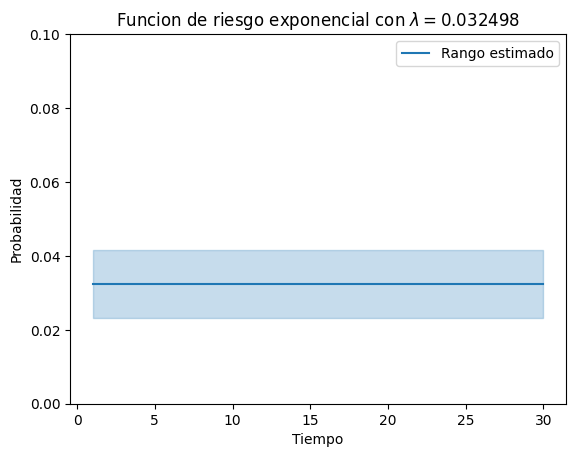

In [10]:
exp.plot_hazard(label = 'Rango estimado')
plt.title('Funcion de riesgo exponencial con $\lambda = 0.032498$')
plt.ylabel('Probabilidad')
plt.xlabel('Tiempo')
plt.ylim(0,0.1)
plt.show()

### c) Riesgo de que la empresa quiebre 

In [11]:
exp.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


El riesgo de que una empresa quiebre según la exponencial es de 0.032498

## 4. Base de datos quiebra (Weibull )

### a) Ajustar un modelo de supervivencia Weibull

In [12]:
mweibull = WeibullFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

### b) Graficar la funcion de riesgo 

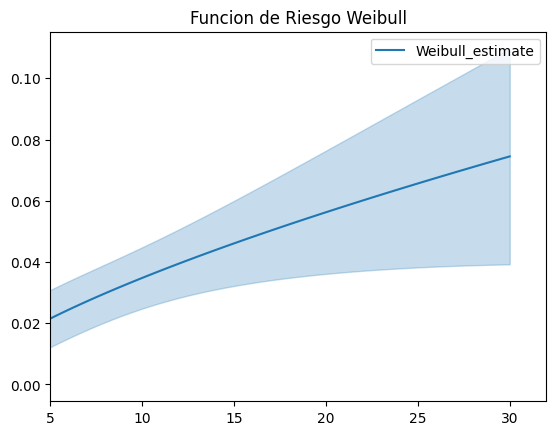

In [13]:
mweibull.plot_hazard()
plt.title('Funcion de Riesgo Weibull')
plt.xlim(5,32)
plt.show()

### c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 
La función de riesgo tiene forma creciente, lo que significa que el riesgo aumenta conforme pasa el tiempo

## 4. Base de datos quiebra (Log-Normal)

### a) Ajustar un modelo de supervivencia Log-Normal

In [14]:
mlog = LogNormalFitter().fit(quiebra['tiempo'], quiebra['quebrar'])


### b) Graficar la funcion de riesgo 

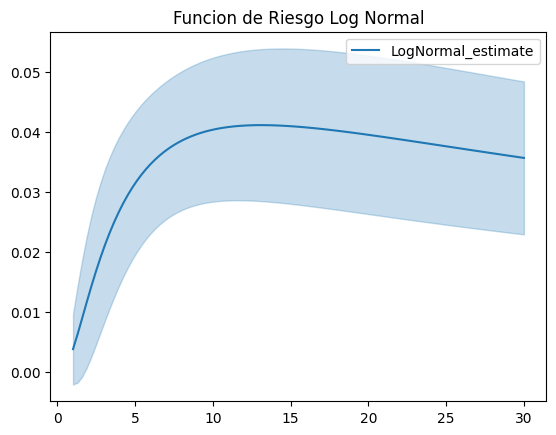

In [15]:
mlog.plot_hazard()
plt.title('Funcion de Riesgo Log Normal')
plt.show()

### c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

In [16]:
mlog.hazard_

,LogNormal_estimate
1.000000,0.003749
1.292929,0.006219
1.585859,0.008870
1.878788,0.011543
2.171717,0.014143
...,...
28.828283,0.036053
29.121212,0.035941
29.414141,0.035829
29.707071,0.035718


In [17]:
mlog_hazard = mlog.hazard_
mlog_hazard = pd.DataFrame(mlog_hazard)


In [18]:
max_id = mlog_hazard.idxmax()
mlog_hazard.loc[max_id]

,LogNormal_estimate
13.010101,0.041069


La gráfica es creciente en el intervalo $[1,13.010101]$ y decreciente de $[13.010101,30]$

## 6. Base de datos quiebra (Kaplan-Meier)

### a) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

In [19]:
km = KaplanMeierFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

(1.0, 30.0)

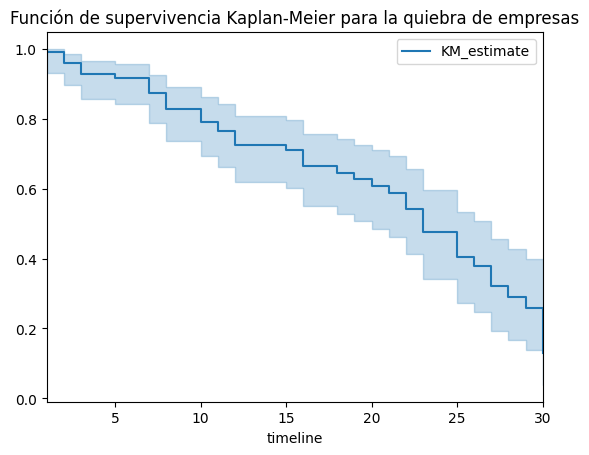

In [20]:
km.plot_survival_function()
plt.title('Función de supervivencia Kaplan-Meier para la quiebra de empresas')
plt.xlim(1,30)

In [21]:
print('La mediana de tiempo de supervivencia:', km.median_survival_time_)

La mediana de tiempo de supervivencia: 23.0


La mediana del tiempo de supervivencia es 23, eso significa que el 50% de las empresas sobreviven 23 años o más sin quebrar

### b)Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False)y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

In [23]:
mujeres = quiebra.query('mujer==1')
hombres = quiebra.query('mujer==0')

In [24]:
mujeres_km = KaplanMeierFitter().fit(mujeres['tiempo'],mujeres['quebrar'])
hombres_km = KaplanMeierFitter().fit(hombres['tiempo'],hombres['quebrar'])

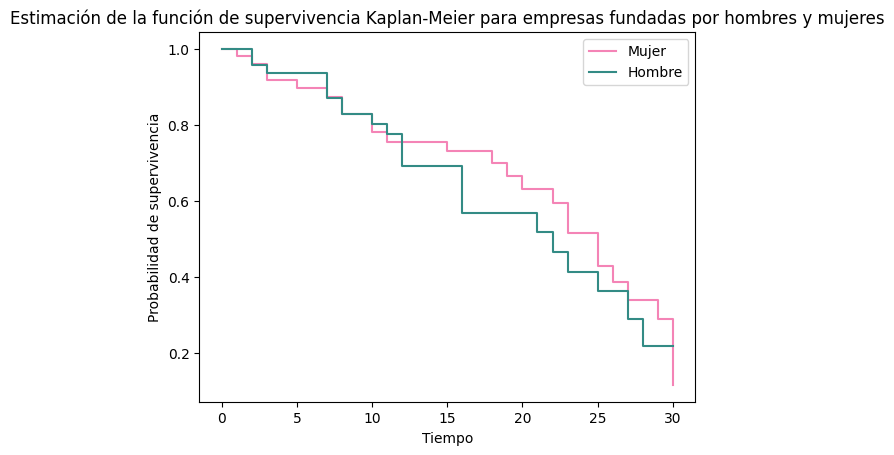

In [33]:
mujeres_km.plot_survival_function(ci_show = False,label = 'Mujer', color = '#f484b6')
hombres_km.plot_survival_function(ci_show = False,label = 'Hombre', color = '#338b85')
plt.title('Estimación de la función de supervivencia Kaplan-Meier para empresas fundadas por hombres y mujeres')
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de supervivencia')
plt.show()

In [31]:
mujeres_km.median_survival_time_

25.0

In [32]:
hombres_km.median_survival_time_

22.0

Lás mujeres tienen mayor probabilidad de que su empresa NO quiebre, además el tiempo promedio que sobreviven (25 años) es mayor que el de los hombres (22 años)

### c)El profesor cree que las empresas fundadas por hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

### Pueba de hipótesis (Log-rank-test)

$H_0 : S(1)=S(2)$ funciones de supervivencia iguales

$H_a : S(1)\neq S(2)$ funciones de supervivencia distintas

In [37]:
LRT = logrank_test(mujeres['tiempo'],hombres['tiempo'],mujeres['quebrar'],hombres['quebrar'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [38]:
print(LRT.p_value.round(3))

0.594


Como el $p-valor = 0.594 > 0.05 = \alpha $. Entonces, no rechazamos $H_0$ con nivel de confianza del 95%, las funciones de supervivencia son iguales, por lo que, las empresas fundadas por mujeres y hombres tienen la misma función de supervivencia de que quiebre la empresa.